<a href="https://colab.research.google.com/github/edithgomezs/Natural-Language-Processing---Final-Project/blob/main/Edith_Task1_NLP_Yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 31.7 MB/s 
     |████████████████████████████████| 182 kB 70.6 MB/s 
     |████████████████████████████████| 7.6 MB 46.4 MB/s 


In [2]:
from sklearn.utils import resample
from google.colab import files
import json
import pandas as pd
from IPython.display import HTML, display
import time
import gc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import nltk 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, multilabel_confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import Trainer, TrainingArguments
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Conect notebook to google drive folders

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 - Can we predict the most popular sentiment about a review? (Useful, Funny, Cool, None (Zero votes for any))

## Reading the Dataset

In [7]:
df = pd.read_csv(r'/content/drive/MyDrive/yelp_data_sample.csv')
df.head(10)

,Unnamed: 0,review_id,stars,useful,funny,cool,text,user_useful,user_funny,user_cool
0,0,BFaW6f0VQ1BHCF0JCtDkyg,4,5,3,2,I lived here for two years and really liked it...,0.628049,0.158537,0.213415
1,1,5cjA-ZZDdZDqQgzhIRLyCw,4,0,0,0,We had a groupon/living social (some deal!) fo...,0.628049,0.158537,0.213415
2,2,4WuqRDC--to0vSiFhSYwXQ,4,1,0,2,I've had lunch many times and its a great deal...,0.628049,0.158537,0.213415
3,3,B5xq-_eZK7wAmzqwRTSGIw,3,1,1,0,We arranged for a rather large group at Jolly'...,0.628049,0.158537,0.213415
4,4,SF0TjRXMZG0Ky4NsY887Aw,4,0,0,0,5 stars for the chocolate pizza (with bananas ...,0.628049,0.158537,0.213415
5,5,KhmqvdkCSz-I--GqE9y8vA,5,1,0,0,"It's best to go on off days/times, but this pl...",0.628049,0.158537,0.213415
6,6,hoWQGSgMYkMsrN-ClgiSEg,5,0,0,0,I love ESP. \n\nI went to their Halloween eve...,0.628049,0.158537,0.213415
7,7,CJZwchkHlrkXQa9wJTOQpQ,4,2,0,2,I've been here twice now and have had a facial...,0.628049,0.158537,0.213415
8,8,lPHydYGuTRD5ncmGL6q01g,1,0,0,0,I will not be returning to Minar in the future...,0.628049,0.158537,0.213415
9,9,J9KICzF17FLwFWt2AOI57A,4,0,0,0,Its really hard to find good produce in Ritten...,0.628049,0.158537,0.213415


In [8]:
df.tail(10)

,Unnamed: 0,review_id,stars,useful,funny,cool,text,user_useful,user_funny,user_cool
1398033,1398033,4ZCXEtTf3TFOnP3m1HGyPQ,5,1,0,0,Everyone was friendly and welcoming. There was...,0.625000,0.125000,0.250000
1398034,1398034,L6OuTqrdiLlMqvLFyWayDg,5,0,0,0,April and John have been with us for 2 purchas...,0.500000,0.000000,0.500000
1398035,1398035,ZWGBkDaS81RZz-SB0_NFQw,3,0,0,0,2/22/2021 - Huge fan of Mad Mex and haven't be...,0.666667,0.000000,0.333333
1398036,1398036,4DGA9HH18s_ifFO0zeR_SA,1,2,0,0,Do not take your dogs to the salon. I unfortun...,0.714286,0.000000,0.285714
1398037,1398037,FRxtN_8JSKdiTU0Eks5NBw,1,0,0,0,I experienced a horrible experience and custom...,0.400000,0.400000,0.200000
1398038,1398038,mQNNgVLdcv0pSjo9xpx1ng,5,0,0,0,"Best tacos ,burritos and tortas in town!!!\nRe...",0.333333,0.333333,0.333333
1398039,1398039,MyrCqiVNZIMdmlwKl45ymg,2,0,0,0,The Mrs. and I tried the updated Diamond Diner...,0.333333,0.333333,0.333333
1398040,1398040,dyzFL_d6f5KnuOqdWl-rBA,5,0,0,0,Not only is this the best Mexican in East Nash...,0.800000,0.100000,0.100000
1398041,1398041,BotWI74kUPrGqczTnddejw,5,0,0,0,Loved it. Amazing burgers. A little loud insid...,0.600000,0.000000,0.400000
1398042,1398042,XNvfChtLjzCyDakIfY07TQ,1,0,0,0,TLDR: Owner flipping off my wife and charging ...,0.333333,0.333333,0.333333


**Creating the class labels:**

*   **1 = useful**
*   **2 = funny**
*   **3 = cool**
*   **0 = none or equal votes**


In [9]:
# create a list of our conditions
conditions = [
    (df['useful'] > df['funny']) & (df['useful'] > df['cool']),
    (df['funny'] > df['useful']) & (df['funny'] >  df['cool']),
    (df['cool'] > df['useful']) & (df['cool'] > df['funny']),
    (df['useful'] == df['funny']) & (df['useful'] == df['cool'])
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '0']   


# create a new column and use np.select to assign values to it using our lists as arguments
df['Label'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Unnamed: 0,review_id,stars,useful,funny,cool,text,user_useful,user_funny,user_cool,Label
0,0,BFaW6f0VQ1BHCF0JCtDkyg,4,5,3,2,I lived here for two years and really liked it...,0.628049,0.158537,0.213415,1
1,1,5cjA-ZZDdZDqQgzhIRLyCw,4,0,0,0,We had a groupon/living social (some deal!) fo...,0.628049,0.158537,0.213415,0
2,2,4WuqRDC--to0vSiFhSYwXQ,4,1,0,2,I've had lunch many times and its a great deal...,0.628049,0.158537,0.213415,3
3,3,B5xq-_eZK7wAmzqwRTSGIw,3,1,1,0,We arranged for a rather large group at Jolly'...,0.628049,0.158537,0.213415,0
4,4,SF0TjRXMZG0Ky4NsY887Aw,4,0,0,0,5 stars for the chocolate pizza (with bananas ...,0.628049,0.158537,0.213415,0


In [10]:
df.tail()

,Unnamed: 0,review_id,stars,useful,funny,cool,text,user_useful,user_funny,user_cool,Label
1398038,1398038,mQNNgVLdcv0pSjo9xpx1ng,5,0,0,0,"Best tacos ,burritos and tortas in town!!!\nRe...",0.333333,0.333333,0.333333,0
1398039,1398039,MyrCqiVNZIMdmlwKl45ymg,2,0,0,0,The Mrs. and I tried the updated Diamond Diner...,0.333333,0.333333,0.333333,0
1398040,1398040,dyzFL_d6f5KnuOqdWl-rBA,5,0,0,0,Not only is this the best Mexican in East Nash...,0.800000,0.100000,0.100000,0
1398041,1398041,BotWI74kUPrGqczTnddejw,5,0,0,0,Loved it. Amazing burgers. A little loud insid...,0.600000,0.000000,0.400000,0
1398042,1398042,XNvfChtLjzCyDakIfY07TQ,1,0,0,0,TLDR: Owner flipping off my wife and charging ...,0.333333,0.333333,0.333333,0


Seeing the class distribution

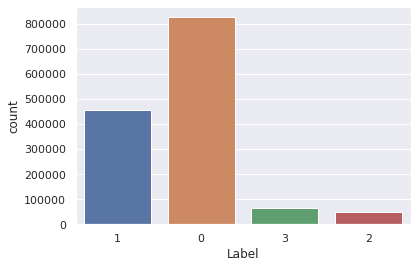

In [11]:
sns.set(style='darkgrid')
ax = sns.countplot(x='Label', data=df)
plt.show()

We can see that there is a big imbalance between the classes, most of them are categorized as useful, therefore we will apply a balancing technique. In this case we have a large amount of data, so oversampling will cause a shortage on the computational resources. Because of this, we will apply undersampling to balance the different classes.

**Downsampling the dataset**

Data before downsampling

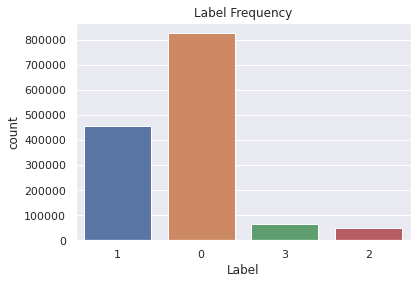

In [12]:
sns.countplot(x=df['Label']).set_title('Label Frequency')
plt.show()

In [15]:
downsampling_size = len(df[df['Label'] == '2'])
useful_data = df[df['Label'] == '1']
funny_data = df[df['Label'] == '2']
cool_data = df[df['Label'] == '3']
draw_data = df[df['Label']== '0']

useful_downsam = resample(useful_data, replace=True, n_samples=downsampling_size, random_state=42)
cool_downsam = resample(cool_data, replace=True, n_samples=downsampling_size, random_state=42)
draw_downsam = resample(draw_data, replace=True, n_samples=downsampling_size, random_state=42)

In [16]:
data_downsampled = pd.concat([useful_downsam, cool_downsam, draw_downsam, funny_data])

In [17]:
# Showing the size of the new downsampled classes

print(useful_downsam.shape)
print(cool_downsam.shape)
print(draw_downsam.shape)

(48740, 11)
(48740, 11)
(48740, 11)


Visualizing the downsampled dataset

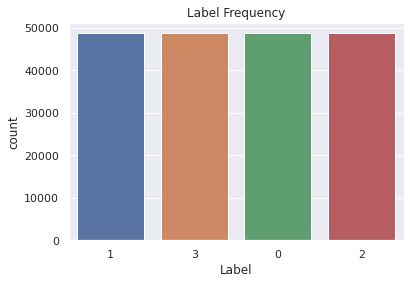

In [18]:
sns.countplot(x=data_downsampled['Label']).set_title('Label Frequency')
plt.show()

Now our dataframe consists of **194,960** data instances. With 4 classes of equal size

In [19]:
data_downsampled.head()

,Unnamed: 0,review_id,stars,useful,funny,cool,text,user_useful,user_funny,user_cool,Label
293792,293792,KQo_f4KPNB3JwCsUL1NaIw,1,2,0,0,First time dinning experience at this pub. We ...,0.743902,0.121951,0.134146,1
362225,362225,fJsYQ4JPD0PaUPp2blcC6w,5,1,0,0,I've been taking my vehicles to Vinney's for y...,0.782609,0.130435,0.086957,1
320644,320644,8MaGuM43VJdtXrevy0yy0Q,4,1,0,0,Wonderful food at a good price \n\nRestaurant....,0.606695,0.117155,0.276151,1
1071431,1071431,EIURxeCKMqjyF3dwmegJ6Q,5,1,0,0,Awesome place\nEverything was great service an...,1.000000,0.000000,0.000000,1
705302,705302,Ar2FS6q9bk4dKSRrMaJKqg,5,1,0,0,Very professional and polite staff. Will be ba...,0.750000,0.000000,0.250000,1


## Approach 1: Classifiers with TFIDF features

In [20]:
data_downsampled.head()

,Unnamed: 0,review_id,stars,useful,funny,cool,text,user_useful,user_funny,user_cool,Label
293792,293792,KQo_f4KPNB3JwCsUL1NaIw,1,2,0,0,First time dinning experience at this pub. We ...,0.743902,0.121951,0.134146,1
362225,362225,fJsYQ4JPD0PaUPp2blcC6w,5,1,0,0,I've been taking my vehicles to Vinney's for y...,0.782609,0.130435,0.086957,1
320644,320644,8MaGuM43VJdtXrevy0yy0Q,4,1,0,0,Wonderful food at a good price \n\nRestaurant....,0.606695,0.117155,0.276151,1
1071431,1071431,EIURxeCKMqjyF3dwmegJ6Q,5,1,0,0,Awesome place\nEverything was great service an...,1.000000,0.000000,0.000000,1
705302,705302,Ar2FS6q9bk4dKSRrMaJKqg,5,1,0,0,Very professional and polite staff. Will be ba...,0.750000,0.000000,0.250000,1


Preprocessing the text to eliminate punctuation, stopwords and stemm the words

In [21]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = ''.join(ch for ch in text if ch not in string.punctuation)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    text = ' '.join(ps.stem(word) for word in text.split())
    return text

In [22]:
data_downsampled['preprocessed_text'] = data_downsampled['text'].apply(preprocess_text)
data_downsampled.head()

,Unnamed: 0,review_id,stars,useful,funny,cool,text,user_useful,user_funny,user_cool,Label,preprocessed_text
293792,293792,KQo_f4KPNB3JwCsUL1NaIw,1,2,0,0,First time dinning experience at this pub. We ...,0.743902,0.121951,0.134146,1,first time din experi pub beer soup flat bread...
362225,362225,fJsYQ4JPD0PaUPp2blcC6w,5,1,0,0,I've been taking my vehicles to Vinney's for y...,0.782609,0.130435,0.086957,1,ive take vehicl vinney year even though vinney...
320644,320644,8MaGuM43VJdtXrevy0yy0Q,4,1,0,0,Wonderful food at a good price \n\nRestaurant....,0.606695,0.117155,0.276151,1,wonder food good price restaurantcom made us t...
1071431,1071431,EIURxeCKMqjyF3dwmegJ6Q,5,1,0,0,Awesome place\nEverything was great service an...,1.000000,0.000000,0.000000,1,awesom place everyth great servic food escargo...
705302,705302,Ar2FS6q9bk4dKSRrMaJKqg,5,1,0,0,Very professional and polite staff. Will be ba...,0.750000,0.000000,0.250000,1,profession polit staff back visit need medic a...


In [23]:
# Create a bag-of-words model and compute the TF-IDF features

vectorizer = TfidfVectorizer(min_df = 100)
tfidf_reviews = vectorizer.fit_transform(data_downsampled['preprocessed_text'])

In [24]:
print(tfidf_reviews.shape)

(194960, 5391)


In [25]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(tfidf_reviews, data_downsampled['Label'], test_size=0.2, random_state=42)

Training a Logistic Regression Classifier:

In [26]:
# Train a multiclass classification model

model = LogisticRegression(multi_class= 'multinomial', solver = 'newton-cg')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [27]:
def conf_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['useful', 'funny', 'cool', 'equal'])
  fig, ax = plt.subplots(figsize=(8,8))
  plt.grid(False)
  disp.plot(ax=ax)
  plt.show()

In [29]:
# Predicting the class labels of the test set
y_pred = model.predict(X_test)

# Printing the classification metrics
print('F1 score:', f1_score(y_test, y_pred, average = 'weighted'))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))

F1 score: 0.40415379864987633
Accuracy:  0.4073912597455888
Precision: 0.40441081036982296
Recall: 0.4073912597455888


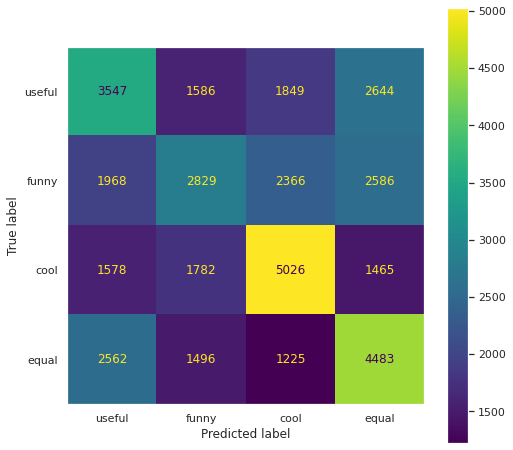

In [30]:
conf_matrix(y_test, y_pred)

Training a Random Forest Classifier:

In [31]:
rf = RandomForestClassifier(n_estimators = 100, criterion="entropy")
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [32]:
y_pred = rf.predict(X_test)

In [33]:
print('F1 score:', f1_score(y_test, y_pred, average = 'weighted'))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))

F1 score: 0.47973468282973925
Accuracy:  0.4810473943373
Precision: 0.48776936563207196
Recall: 0.4810473943373


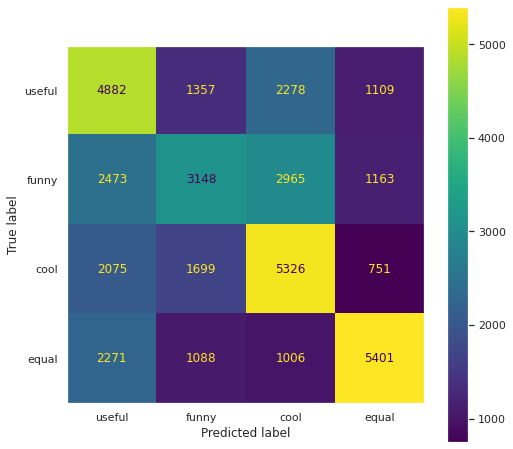

In [34]:
conf_matrix(y_test, y_pred)

Naive Bayes Classifier:

In [35]:
NB = MultinomialNB() 
NB.fit(X_train, y_train)

MultinomialNB()

In [36]:
y_pred = NB.predict(X_test)

In [37]:
print('F1 score:', f1_score(y_test, y_pred, average = 'weighted'))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))

F1 score: 0.394546859043441
Accuracy:  0.40444193680755025
Precision: 0.40059014504951845
Recall: 0.40444193680755025


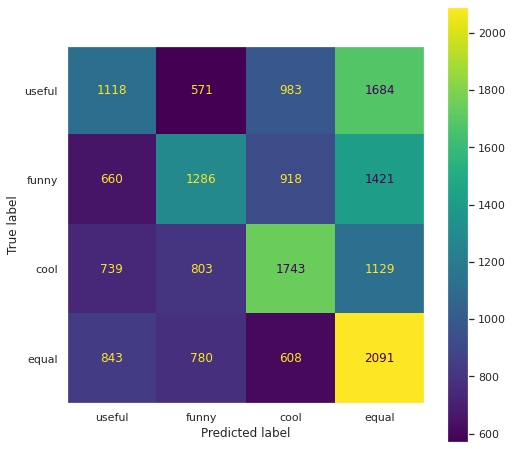

In [ ]:
conf_matrix(y_test, y_pred)

## Approach 2: Fine tune BERT

For this part we will Fine tune a BERT base cased classifier to fit better to our data

In [ ]:
data_downsampled['Label'] = data_downsampled['Label'].replace(['1','2','3','0'],[1,2,3,0]) 

In [ ]:
# Truncate the input text data to the maximum sequence length of the BERT model
# Tokenize the text data and create input features for BERT
MAX_LEN = 512
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', num_labels=4, do_lower_case = True)

# input_ids = data_downsampled['preprocessed_text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=False)[:MAX_LEN]).tolist()

# Convert the token IDs to integer values
# data_downsampled['preprocessed_text'] = data_downsampled['preprocessed_text'].apply(lambda x: [int(token_id) if token_id.isdigit() else token_id for token_id in x])


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
y = data_downsampled['Label'].values
df2 = data_downsampled.copy()
df2.drop(['Label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, stratify=y)

train_text = X_train['text'].values.tolist()
valid_text = X_test['text'].values.tolist()
train_label = y_train
valid_label = y_test

In [ ]:
# tokenize the dataset, truncate when passed `max_length`, and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_text, truncation=True, padding=True, max_length=MAX_LEN)
valid_encodings = tokenizer(valid_text, truncation=True, padding=True, max_length=MAX_LEN)

In [ ]:
class CreationofTorchDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = CreationofTorchDataset(train_encodings, train_label)
valid_dataset = CreationofTorchDataset(valid_encodings, valid_label)

In [ ]:
# load the model and pass to CUDA
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=4).to("cuda")

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  acc = accuracy_score(labels, preds)
  recall = recall_score(labels, preds, average='macro')
  precision = precision_score(labels, preds, average='macro')
  f1 = f1_score(labels, preds, average='macro')
  return {
      'accuracy': acc,
      'precision': precision,
      'recall': recall,
      'f1': f1
}

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=1000,              
    save_steps=50000,
    evaluation_strategy="steps", 
)    

In [ ]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 69507
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 17378
  Number of trainable parameters = 109485316


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1000,1.366400,1.339936,0.357772,0.365178,0.357773,0.318120
2000,1.345800,1.342810,0.359843,0.370138,0.359846,0.326849
3000,1.333800,1.336370,0.354607,0.398219,0.354597,0.335773
4000,1.330200,1.328614,0.356103,0.360151,0.356104,0.340041
5000,1.325500,1.334816,0.355643,0.360654,0.355646,0.347854
6000,1.312800,1.322416,0.365310,0.374167,0.365314,0.352859
7000,1.322900,1.317649,0.368993,0.394563,0.368997,0.336551
8000,1.311200,1.324011,0.366059,0.385332,0.366047,0.350081
9000,1.288400,1.322661,0.379755,0.399501,0.379758,0.377233
10000,1.264400,1.308779,0.378259,0.404709,0.378252,0.347496


***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20
***** Running Evaluation *****
  Num examples = 17377
  Batch si

TrainOutput(global_step=17378, training_loss=1.280887522539948, metrics={'train_runtime': 24365.8852, 'train_samples_per_second': 5.705, 'train_steps_per_second': 0.713, 'total_flos': 3.657677705426534e+16, 'train_loss': 1.280887522539948, 'epoch': 2.0})

In [ ]:
# evaluate the current model after training

trainer.evaluate()

***** Running Evaluation *****
  Num examples = 17377
  Batch size = 20


{'eval_loss': 1.2860496044158936,
 'eval_accuracy': 0.40588133740001153,
 'eval_precision': 0.4196712329942906,
 'eval_recall': 0.4058825368165182,
 'eval_f1': 0.4078897961522788,
 'eval_runtime': 614.5125,
 'eval_samples_per_second': 28.278,
 'eval_steps_per_second': 1.414,
 'epoch': 2.0}

## Approach 3: LSTM with word2vec embeddings

In [38]:
# Creatign categorical labels for the classes

conditions = [
    (data_downsampled['Label'] == '1'),
    (data_downsampled['Label'] == '2'),
    (data_downsampled['Label'] == '3'),
    (data_downsampled['Label'] == '0')
    ]

# create a list of the values we want to assign for each condition
values = ['useful', 'funny', 'cool', 'equal']   


# create a new column and use np.select to assign values to it using our lists as arguments
data_downsampled['str_Label'] = np.select(conditions, values)

# display updated DataFrame
data_downsampled.head()

,Unnamed: 0,review_id,stars,useful,funny,cool,text,user_useful,user_funny,user_cool,Label,preprocessed_text,str_Label
293792,293792,KQo_f4KPNB3JwCsUL1NaIw,1,2,0,0,First time dinning experience at this pub. We ...,0.743902,0.121951,0.134146,1,first time din experi pub beer soup flat bread...,useful
362225,362225,fJsYQ4JPD0PaUPp2blcC6w,5,1,0,0,I've been taking my vehicles to Vinney's for y...,0.782609,0.130435,0.086957,1,ive take vehicl vinney year even though vinney...,useful
320644,320644,8MaGuM43VJdtXrevy0yy0Q,4,1,0,0,Wonderful food at a good price \n\nRestaurant....,0.606695,0.117155,0.276151,1,wonder food good price restaurantcom made us t...,useful
1071431,1071431,EIURxeCKMqjyF3dwmegJ6Q,5,1,0,0,Awesome place\nEverything was great service an...,1.000000,0.000000,0.000000,1,awesom place everyth great servic food escargo...,useful
705302,705302,Ar2FS6q9bk4dKSRrMaJKqg,5,1,0,0,Very professional and polite staff. Will be ba...,0.750000,0.000000,0.250000,1,profession polit staff back visit need medic a...,useful


Splitting dataframe into test and train

In [39]:
!pip install gensim --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 5.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [40]:
data_txt_label = data_downsampled[['preprocessed_text', 'str_Label']]
train, test = train_test_split(data_txt_label, test_size=0.2, random_state=42, shuffle=True)

In [41]:
# Building one hot encode labels for both train and test data

# Train Data Labels
train["str_Label"] = train["str_Label"].astype('category')
train["enc_label"] = train["str_Label"].cat.codes
train_features, train_labels = train['preprocessed_text'], tf.one_hot(train["enc_label"], 4)

# Test Data Labels
test["str_Label"] = test["str_Label"].astype('category')
test["enc_label"] = test["str_Label"].cat.codes
test_features, test_labels = test['preprocessed_text'], tf.one_hot(test["enc_label"], 4)

In [42]:
# Tokenizing the text
from nltk.tokenize import word_tokenize

tokenized_train_features = [word_tokenize(train_text) for train_text in train_features]
tokenized_test_features = [word_tokenize(test_text) for test_text in test_features]

In [43]:
# Generating the embedding for the training data with word2vec
from gensim.models import word2vec

w2v_model = word2vec.Word2Vec(tokenized_train_features, vector_size=300,  # Dimensionality of the word vectors
                              window=20, min_count=10, sg=1  # 1 for skip-gram
                              )

In [44]:
# Comparing the Out of Vocabulary words from the test data by using the vocabulary used to train the Word2Vec model

vocab_list = list(w2v_model.wv.key_to_index.keys()) #list of keys of the train vocabulary index2word

In [45]:
# This function compares each token to the vocabulary provided and eliminates the ones that are out of vocabulary

def remove_OOV_vocab(sample: list, list_vocab):
    vocab_sample = []
    for token in sample:
        if token in list_vocab:
            vocab_sample.append(token)
    return vocab_sample

In [46]:
# Applying the function to the tokenized test features

tokenized_test_features = [remove_OOV_vocab(test_sample, vocab_list) for test_sample in tokenized_test_features]

In [47]:
# Generating the embedding matrix

vocab = w2v_model.wv.key_to_index.keys() # index2word
embedding_matrix = w2v_model.wv[vocab]

In [48]:
len(vocab)

16974

In [49]:
# Preparing the train and test data to pass to the model

max_seq_len = 50 # max size of the sequences

def w2v_indexed_token_sequences(w2v_model, list_features):
    indexed_features = []
    for seq in list_features:
        list_token_indices = []
        for token in seq:
            try:
                list_token_indices.append(w2v_model.wv.key_to_index[token])     #vocab[token].index)
            except KeyError as e:
                continue
        indexed_features.append(list_token_indices)
    return indexed_features

In [50]:
# Indexing the training and test features, padding at the end 
 
indexed_train_features = w2v_indexed_token_sequences(w2v_model, tokenized_train_features)
indexed_test_features = w2v_indexed_token_sequences(w2v_model, tokenized_test_features)

padded_train = pad_sequences(indexed_train_features, padding = 'post', maxlen=max_seq_len, truncating='post')
padded_test = pad_sequences(indexed_test_features, padding = 'post', maxlen=max_seq_len, truncating='post')


In [52]:
# Creating the model 

model = Sequential()
model.add(Embedding(input_dim=16974, output_dim=300,
                    weights=[embedding_matrix],
                    input_length=max_seq_len))
model.add(Dropout(0.6))
model.add(LSTM(max_seq_len,return_sequences=True))
model.add(LSTM(4))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 300)           5092200   
                                                                 
 dropout (Dropout)           (None, 50, 300)           0         
                                                                 
 lstm (LSTM)                 (None, 50, 50)            70200     
                                                                 
 lstm_1 (LSTM)               (None, 4)                 880       
                                                                 
 dense (Dense)               (None, 4)                 20        
                                                                 
Total params: 5,163,300
Trainable params: 5,163,300
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Adding callbacks for best model checkpoint

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss",
                                           patience=2, verbose=1,
                                           restore_best_weights=True),
             keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/try2_lstm_with_w2v.hdf5',
                                             verbose=1,save_best_only=True)]

In [55]:
# Compiling the model

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
tf.config.run_functions_eagerly(True)

In [56]:
# storing model training details to analyze later
history = model.fit(padded_train, train_labels, validation_split=0.2,
                    callbacks=callbacks, epochs=10)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
3900/3900 [==============================] - ETA: 0s - loss: 1.3199 - accuracy: 0.3628
Epoch 1: val_loss improved from inf to 1.28024, saving model to /content/drive/MyDrive/try2_lstm_with_w2v.hdf5
3900/3900 [==============================] - 152s 38ms/step - loss: 1.3199 - accuracy: 0.3628 - val_loss: 1.2802 - val_accuracy: 0.4022
Epoch 2/10
3900/3900 [==============================] - ETA: 0s - loss: 1.2572 - accuracy: 0.4191
Epoch 2: val_loss improved from 1.28024 to 1.26823, saving model to /content/drive/MyDrive/try2_lstm_with_w2v.hdf5
3900/3900 [==============================] - 155s 40ms/step - loss: 1.2572 - accuracy: 0.4191 - val_loss: 1.2682 - val_accuracy: 0.4109
Epoch 3/10
3900/3900 [==============================] - ETA: 0s - loss: 1.2156 - accuracy: 0.4496
Epoch 3: val_loss did not improve from 1.26823
3900/3900 [==============================] - 147s 38ms/step - loss: 1.2156 - accuracy: 0.4496 - val_loss: 1.2785 - val_accuracy: 0.4103
Epoch 4/10
3900/3900 [===

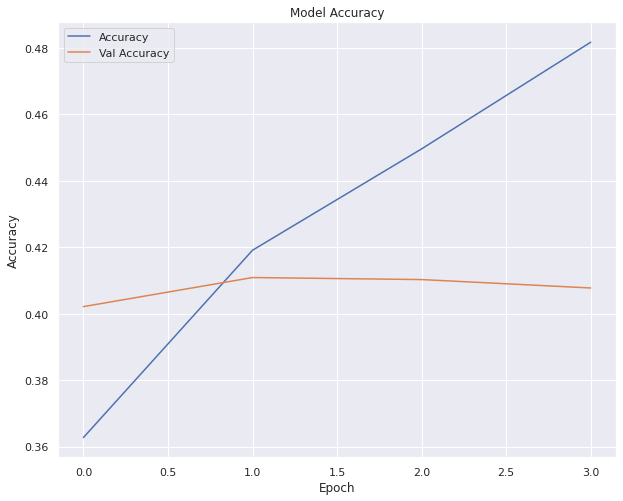

In [57]:
# Showing the training metrics
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Val Accuracy'])
plt.show()

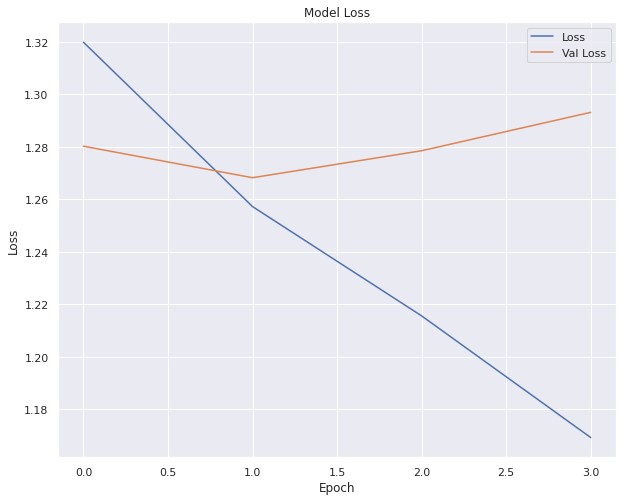

In [58]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Val Loss'])
plt.show()

In [60]:
# Model Evaluation

model_with_w2v = keras.models.load_model('/content/drive/MyDrive/try2_lstm_with_w2v.hdf5')
y_pred_one_hot_encoded = (model_with_w2v.predict(padded_train)> 0.5).astype("int32")

# Decoding the one-hot enc
y_pred_train = np.array(tf.argmax(y_pred_one_hot_encoded, axis=1))

# Same procedure for the test set
y_pred_one_hot_encoded = (model_with_w2v.predict(padded_test)> 0.5).astype("int32")
y_pred_test = np.array(tf.argmax(y_pred_one_hot_encoded, axis=1))

1219/1219 [==============================] - 12s 10ms/step


In [61]:
from sklearn.metrics import classification_report

# Metrics for the training set
print(classification_report(train['enc_label'], y_pred_train))

              precision    recall  f1-score   support

           0       0.29      0.96      0.45     38974
           1       0.00      0.00      0.00     39114
           2       0.64      0.36      0.46     38889
           3       0.60      0.09      0.15     38991

    accuracy                           0.35    155968
   macro avg       0.38      0.35      0.26    155968
weighted avg       0.38      0.35      0.26    155968



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# Metrics for the test set
print(classification_report(test['enc_label'], y_pred_test))

              precision    recall  f1-score   support

           0       0.29      0.95      0.44      9766
           1       0.00      0.00      0.00      9626
           2       0.57      0.30      0.39      9851
           3       0.52      0.07      0.13      9749

    accuracy                           0.33     38992
   macro avg       0.34      0.33      0.24     38992
weighted avg       0.34      0.33      0.24     38992



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# Test metrics

print('F1 score:', f1_score(test['enc_label'], y_pred_test, average = 'weighted'))
print('Accuracy: ', accuracy_score(test['enc_label'], y_pred_test))
print('Precision:', precision_score(test['enc_label'], y_pred_test, average = 'weighted', zero_division=0))
print('Recall:', recall_score(test['enc_label'], y_pred_test, average='weighted'))

F1 score: 0.240689680451381
Accuracy:  0.3313243742306114
Precision: 0.343854363697714
Recall: 0.3313243742306114
